In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import textwrap
from datetime import datetime
import os
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from google.colab import files

# Upload file PDF
uploaded = files.upload()

Saving JURNAL.pdf to JURNAL (1).pdf


In [35]:
!pip install PyMuPDF

In [56]:
import fitz

pdf_path = "JURNAL.pdf"
doc = fitz.open(pdf_path)

text = ""
for page in doc:
    text += page.get_text("text")

In [63]:
corresponding_author = "Rakha Wardhana"
affiliation = "Bina Nusantara University (BINUS)"
country = "Indonesia"

def make_snippet(title, text, max_chars=2000):
    """
    Format a snippet block: title, newline, wrapped text (max_chars chars).
    Uses the raw extracted text (which should include punctuation).
    """
    t = text.strip()
    if not t:
        t = "[TEKS TIDAK DITEMUKAN]"
    if len(t) > max_chars:
        cut = t.rfind('.', 0, max_chars)
        if cut == -1:
            cut = max_chars
        t = t[:cut+1]
    wrapped = textwrap.fill(t, width=100)
    block = f"{title}\n{'-'*len(title)}\n{wrapped}\n"
    return block

header = f"Cuplikan Artikel (ekstraksi otomatis)\nDihasilkan: {datetime.now().isoformat(sep=' ', timespec='seconds')}\n\n"
meta = f"Corresponding Author: {corresponding_author}\nAffiliation: {affiliation}\nCountry: {country}\n\n"

snippet_abstrak = make_snippet("ABSTRAK", abstrak, max_chars=2000)
snippet_pendahuluan = make_snippet("PENDAHULUAN", pendahuluan, max_chars=3000)
snippet_kesimpulan = make_snippet("KESIMPULAN", kesimpulan, max_chars=1500)

footer = "\n(End of cuplikan)\n"

full_text = header + meta + snippet_abstrak + "\n" + snippet_pendahuluan + "\n" + snippet_kesimpulan + footer

print(full_text)

outpath = "Cuplikan_Artikel.txt"
with open(outpath, "w", encoding="utf-8") as f:
    f.write(full_text)

Cuplikan Artikel (ekstraksi otomatis)
Dihasilkan: 2025-10-10 13:21:58

Corresponding Author: Rakha Wardhana
Affiliation: Bina Nusantara University (BINUS)
Country: Indonesia

ABSTRAK
-------
transformasi digital selalu menghadirkan upaya pengambilan keputusan yang berlandaskan data. dalam
rangka  mendukung transformasi digital di bidang kesehatan, maka diperlukan perangkat yang dapat
melakukan proses  prediksi untuk mendukung pengambilan keputusan. penerapan machine learning untuk
proses prediksi tingkat  persebaran penyakit dapat membantu pengambil kebijakan dalam merumuskan
kebijakan pelayanan kesehatan  secara cepat. pemodelan machine learning menggunakan berbagai teknik
dalam algoritma klasifikasi dengan  framework yang dimiliki oleh bahasa pemrograman python. dalam
hal ini, data yang digunakan merupakan  dataset yang dikoleksi dari profil kesehatan indonesia, yang
berisi informasi tingkat pelayanan kesehatan,  kebijakan kesehatan, serta tingkat sosio-demografi.
pemodelan dengan te

Tabel 1: Frekuensi kata (total kemunculan)
konsonan   0     1     2      3     4     5     6     7     8    9    12
vokal                                                                   
0         0.0   0.0   2.0    1.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0
1         3.0  21.0  31.0   26.0   1.0   2.0   0.0   0.0   0.0  0.0  0.0
2         0.0   8.0  46.0  105.0  61.0  32.0   3.0   0.0   0.0  0.0  0.0
3         0.0   0.0  10.0   23.0  55.0  79.0  19.0   3.0   1.0  0.0  0.0
4         0.0   0.0   0.0   12.0  30.0  74.0  26.0  25.0  18.0  1.0  0.0
5         0.0   0.0   0.0    0.0   9.0   9.0  14.0  12.0   4.0  4.0  0.0
6         0.0   0.0   0.0    0.0   0.0   0.0   1.0   0.0   5.0  0.0  0.0
7         0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  1.0 

Tabel 2: Cacah kata unik
konsonan   0    1     2     3     4     5     6     7    8    9    12
vokal                                                                
0         0.0  0.0   1.0   1.0   0.0   0.0   0.0   0.0  0.0 

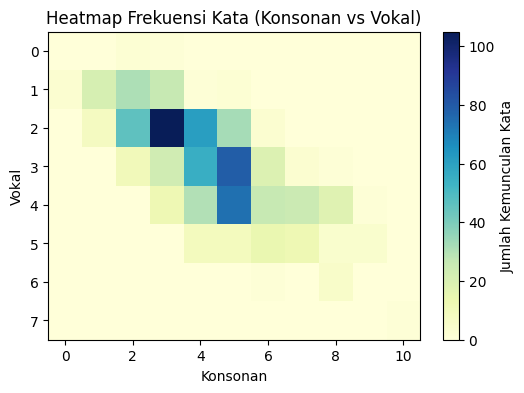

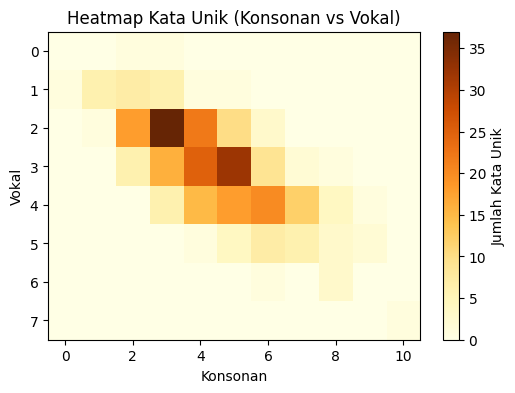

In [64]:
vowels = "aeiou"

combo_freq = Counter()
combo_unique = defaultdict(set)

for k in kata:
    v = sum(1 for c in k if c in vowels)
    c = sum(1 for c in k if c.isalpha() and c not in vowels)
    combo_freq[(v, c)] += 1
    combo_unique[(v, c)].add(k.lower())

rows = []
for (v, c), freq in combo_freq.items():
    rows.append({
        "vokal": v,
        "konsonan": c,
        "frekuensi": freq,
        "kata_unik": len(combo_unique[(v, c)])
    })
df = pd.DataFrame(rows)

pivot_freq = df.pivot_table(index="vokal", columns="konsonan", values="frekuensi", fill_value=0)
print("Tabel 1: Frekuensi kata (total kemunculan)")
print(pivot_freq, "\n")
pivot_unique = df.pivot_table(index="vokal", columns="konsonan", values="kata_unik", fill_value=0)
print("Tabel 2: Cacah kata unik")
print(pivot_unique)

#Visualisasi
plt.figure(figsize=(6,4))
plt.imshow(pivot_freq, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Jumlah Kemunculan Kata")
plt.xlabel("Konsonan")
plt.ylabel("Vokal")
plt.title("Heatmap Frekuensi Kata (Konsonan vs Vokal)")
plt.show()

plt.figure(figsize=(6,4))
plt.imshow(pivot_unique, cmap="YlOrBr", aspect="auto")
plt.colorbar(label="Jumlah Kata Unik")
plt.xlabel("Konsonan")
plt.ylabel("Vokal")
plt.title("Heatmap Kata Unik (Konsonan vs Vokal)")
plt.show()

Sebagian besar kata berada di kisaran 2–4 konsonan dan 2–3 vokal, yang menandakan teks bersifat informatif namun mudah dipahami.
Pola ini konsisten dengan karakteristik penulisan akademik yang padat, efisien, dan berorientasi pada penyampaian makna secara jelas.

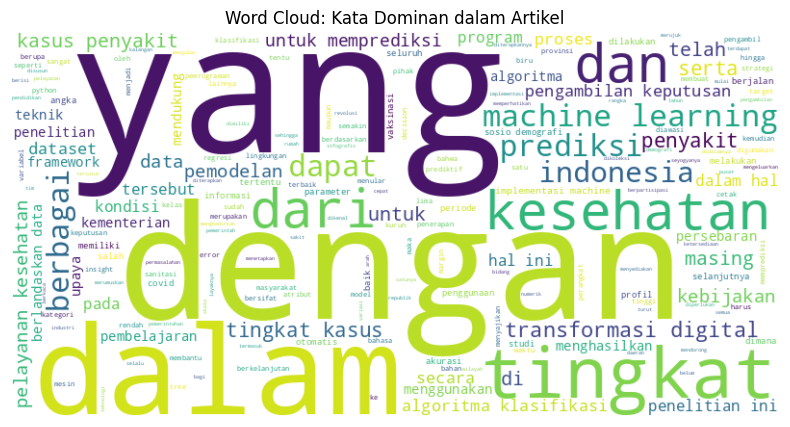

In [70]:
gabungan = abstrak + " " + pendahuluan + " " + kesimpulan

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(gabungan)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Kata Dominan dalam Artikel")
plt.show()

Word Cloud memperlihatkan bahwa kata-kata paling besar seperti “yang”, “dengan”, dan “dalam” mendominasi karena berfungsi sebagai kata penghubung umum dalam struktur kalimat ilmiah.
Namun, kata penting lainnya seperti “kesehatan”, “machine learning”, dan “prediksi” menegaskan fokus penelitian pada penerapan teknologi analitik data dalam mendukung transformasi digital kesehatan di Indonesia.

Total Kalimat: 210
Rata-rata kata per kalimat: 3.95
Kalimat terpendek: 1 kata
Kalimat terpanjang: 13 kata


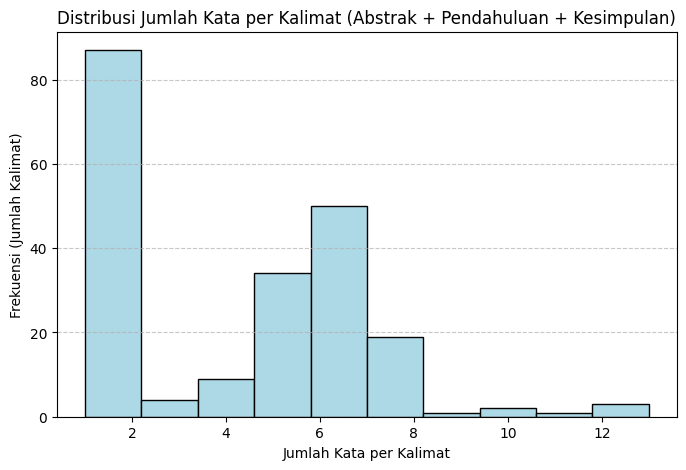

In [65]:
gabungan = abstrak + " " + pendahuluan + " " + kesimpulan
kalimat = re.split(r'(?<=[.!?])\s+|(?<=\n)|(?<=[a-z])(?=[A-Z])', gabungan)
kalimat = [k.strip() for k in kalimat if len(k.strip()) > 1]

jumlah_kata_per_kalimat = [len(re.findall(r'\b[a-zA-Z]+\b', k)) for k in kalimat]

jumlah_kata_per_kalimat = [j for j in jumlah_kata_per_kalimat if j > 0]

print("Total Kalimat:", len(jumlah_kata_per_kalimat))
print("Rata-rata kata per kalimat:", round(sum(jumlah_kata_per_kalimat)/len(jumlah_kata_per_kalimat), 2))
print("Kalimat terpendek:", min(jumlah_kata_per_kalimat), "kata")
print("Kalimat terpanjang:", max(jumlah_kata_per_kalimat), "kata")

# Histogram
plt.figure(figsize=(8,5))
plt.hist(jumlah_kata_per_kalimat, bins=10, color='lightblue', edgecolor='black')
plt.title("Distribusi Jumlah Kata per Kalimat (Abstrak + Pendahuluan + Kesimpulan)")
plt.xlabel("Jumlah Kata per Kalimat")
plt.ylabel("Frekuensi (Jumlah Kalimat)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

hasil ekstraksi teks masih memiliki banyak potongan kalimat pendek, yang menyebabkan rata-rata panjang kalimat menjadi kecil (sekitar 4 kata per kalimat).
Meskipun demikian, pola histogram menunjukkan bahwa sebagian besar isi teks tersusun dari unit-unit kalimat pendek dengan panjang sedang (5–8 kata), yang menggambarkan struktur tulisan ilmiah yang padat dan efisien.

Total Paragraf: 13
Rata-rata kalimat per paragraf: 16.46
Paragraf terpendek: 2 kalimat
Paragraf terpanjang: 38 kalimat


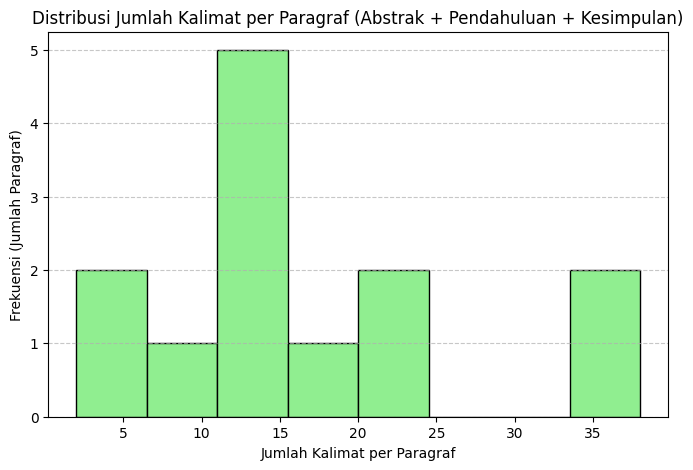

In [66]:
gabungan = abstrak + "\n" + pendahuluan + "\n" + kesimpulan
paragraf = re.split(r'\n\s*\n|(?<=\.)\s{2,}', gabungan)
paragraf = [p.strip() for p in paragraf if len(p.strip()) > 1]

jumlah_kalimat_per_paragraf = []
for p in paragraf:
    kalimat = re.split(r'(?<=[.!?])\s+|(?<=\n)|(?<=[a-z])(?=[A-Z])', p)
    kalimat = [k.strip() for k in kalimat if len(k.strip()) > 1]
    jumlah_kalimat_per_paragraf.append(len(kalimat))

print("Total Paragraf:", len(jumlah_kalimat_per_paragraf))
print("Rata-rata kalimat per paragraf:", round(sum(jumlah_kalimat_per_paragraf)/len(jumlah_kalimat_per_paragraf), 2))
print("Paragraf terpendek:", min(jumlah_kalimat_per_paragraf), "kalimat")
print("Paragraf terpanjang:", max(jumlah_kalimat_per_paragraf), "kalimat")

plt.figure(figsize=(8,5))
plt.hist(jumlah_kalimat_per_paragraf, bins=8, color='lightgreen', edgecolor='black')
plt.title("Distribusi Jumlah Kalimat per Paragraf (Abstrak + Pendahuluan + Kesimpulan)")
plt.xlabel("Jumlah Kalimat per Paragraf")
plt.ylabel("Frekuensi (Jumlah Paragraf)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nilai ini menunjukkan kecenderungan struktur paragraf yang cukup panjang, yang mungkin disebabkan oleh penggabungan beberapa paragraf pada hasil ekstraksi PDF.
Meskipun demikian, pola distribusi menunjukkan bahwa sebagian besar paragraf memiliki panjang sedang (10–15 kalimat), sesuai dengan gaya penulisan ilmiah yang padat dan berorientasi penjelasan mendalam.